In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Note: data downloaded from Yu group Github on 5/7/20
demo = pd.read_csv('data/county_data_abridged.csv')
demo.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [22]:
demo.shape

(3244, 87)

In [23]:
demo.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [24]:
# Note: data downloaded from CSSE Github on 5/7/20
infections = pd.read_csv('data/05-06-2020.csv')
infections.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-07 02:32:28,34.223334,-82.461707,33,0,0,33,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-07 02:32:28,30.295065,-92.414197,140,10,0,130,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-07 02:32:28,37.767072,-75.632346,429,7,0,422,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-07 02:32:28,43.452658,-116.241552,717,19,0,698,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-07 02:32:28,41.330756,-94.471059,3,0,0,3,"Adair, Iowa, US"


In [25]:
infections.shape

(3216, 12)

In [32]:
demo['Combined_Key'] = demo['CountyName'] + ', ' + demo['State'] + ', US'
demo['Combined_Key']

0       Autauga, Alabama, US
1       Baldwin, Alabama, US
2       Barbour, Alabama, US
3          Bibb, Alabama, US
4        Blount, Alabama, US
                ...         
3239                     NaN
3240                     NaN
3241                     NaN
3242                     NaN
3243                     NaN
Name: Combined_Key, Length: 3244, dtype: object

In [33]:
df = demo.merge(infections, on = 'Combined_Key')
df.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,Autauga,Alabama,US,2020-05-07 02:32:28,32.539527,-86.644082,58,3,0,55
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,Baldwin,Alabama,US,2020-05-07 02:32:28,30.727750,-87.722071,196,5,0,191
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,Barbour,Alabama,US,2020-05-07 02:32:28,31.868263,-85.387129,47,1,0,46
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,Bibb,Alabama,US,2020-05-07 02:32:28,32.996421,-87.125115,43,0,0,43
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,Blount,Alabama,US,2020-05-07 02:32:28,33.982109,-86.567906,42,0,0,42


In [34]:
df.shape

(2775, 99)

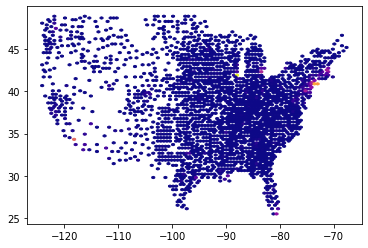

In [39]:
plt.hexbin(x = df['lon'], y = df['lat'], C = df['Confirmed'], cmap = 'plasma')